In [1]:
from functions_produtividade import *

In [2]:
with open('dados_ndvi_pkl/p1/filtered_2001.pkl', 'rb') as f:  # Python 3: open(..., 'rb')
    result_p1 = pickle.load(f)

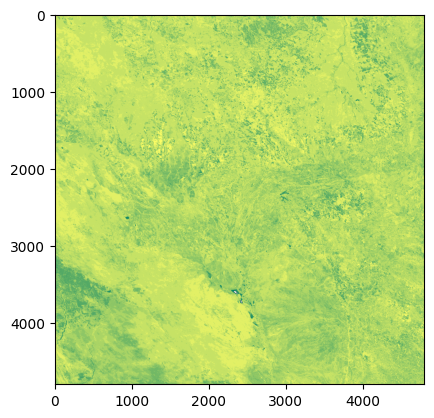

In [3]:
import matplotlib.pyplot as plt
cmap = plt.get_cmap('summer', 10)
fig, ax  = plt.subplots()
ndvi_p1 = ax.imshow(result_p1[0,:,:], cmap=cmap)                     
plt.show()

In [5]:
with open('dados_ndvi_pkl/p2/filtered_2001.pkl', 'rb') as f2:  # Python 3: open(..., 'rb')
    result_p2 = pickle.load(f2)

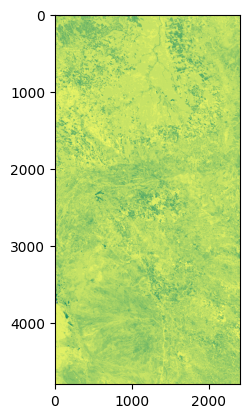

In [6]:
import matplotlib.pyplot as plt
cmap = plt.get_cmap('summer', 10)
fig, ax  = plt.subplots()
ndvi_p2 = ax.imshow(result_p2[0,:,:], cmap=cmap)                     
plt.show()

In [10]:
result_p1.shape

(23, 4800, 2400)

In [18]:
result_p1_teste = result_p1[0]
result_p2_teste = result_p2[0]

(4800, 2400)

In [42]:
combined_df = []
for i in range(0,5):
    result_p1_teste = result_p1[i]
    result_p2_teste = result_p2[i]
    result = np.concatenate((result_p1_teste, result_p2_teste), axis=1)
    combined_df.append(result)
    print(i)

result_final = np.stack(combined_df)
result_final.shape

0
1
2
3
4


(5, 4800, 4800)

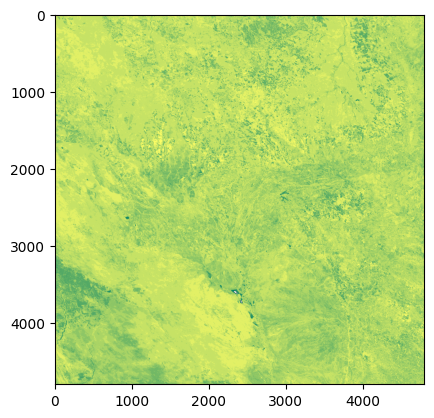

In [61]:
with open('dados_ndvi_pkl/ndvi_2001.pkl', 'rb') as f:  # Python 3: open(..., 'rb')
    teste = pickle.load(f)

import matplotlib.pyplot as plt
cmap = plt.get_cmap('summer', 10)
fig, ax  = plt.subplots()
teste_t = ax.imshow(teste[0,:,:], cmap=cmap)                     
plt.show()

In [4]:

import os
import os.path as osp
import pickle
import json
import time
import pystac_client
import osgeo 
import osgeo_utils 
from osgeo import gdal
from osgeo import ogr, osr
import pandas as pd 
import netCDF4
import numpy as np
import shapely
import rpy2
from matplotlib import pyplot as plt
from pyproj import Transformer
from pyproj.crs import CRS
import rasterio
from rasterio.crs import CRS
from rasterio.warp import transform
from rasterio.windows import Window
from rasterio.windows import from_bounds
from rasterio.enums import Resampling
from rasterio.io import MemoryFile
from rasterio.transform import Affine
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import scipy
from joblib import Parallel, delayed
from scipy.ndimage import generic_filter
from scipy.signal import savgol_filter
import matplotlib.pyplot as plt

ERROR 1: PROJ: proj_create_from_database: Open of /opt/conda/envs/geospatial/share/proj failed


In [63]:
dataset = rasterio.open('/home/jovyan/Desktop/enandes_v2/modelo_produtividade/dados_ndvi_pkl/ndvi_2001.tif')
print(f"Número de bandas: {dataset.count}")
print(f"Altura: {dataset.height} pixels")
print(f"Largura: {dataset.width} pixels")
print(f"Sistema de Coordenadas (CRS): {dataset.crs}")
print(f"Transformação (Affine): {dataset.transform}")
print(f"Tipos de dados das bandas: {dataset.dtypes}")

Número de bandas: 23
Altura: 4800 pixels
Largura: 4800 pixels
Sistema de Coordenadas (CRS): EPSG:4326
Transformação (Affine): | 0.00, 0.00,-63.85|
| 0.00,-0.00,-10.00|
| 0.00, 0.00, 1.00|
Tipos de dados das bandas: ('float64', 'float64', 'float64', 'float64', 'float64', 'float64', 'float64', 'float64', 'float64', 'float64', 'float64', 'float64', 'float64', 'float64', 'float64', 'float64', 'float64', 'float64', 'float64', 'float64', 'float64', 'float64', 'float64')


In [6]:
banda_unica = dataset.read(1)

plt.figure(figsize=(8, 8)) # Ajusta o tamanho da figura
plt.imshow(banda_unica, cmap='gray') # 'gray' é um mapa de cores comum para monocromático
plt.title("Imagem TIFF - Banda Única")
plt.colorbar(label='Valores dos Pixels') # Adiciona uma barra de cores
plt.show()

NameError: name 'dataset' is not defined